In [6]:
import numpy as np 
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import matplotlib.pyplot as plt 

In [7]:
class Generator(nn.Module):
    def __init__(self, input_size, n_filters):
        super().__init__()

        self.network = nn.Sequential(
            nn.ConvTranspose2d(input_size, n_filters*4, 4, 1, 0, bias=False),
            nn.BatchNorm2d(n_filters*4),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(n_filters*4, n_filters*2, 3, 2, 1, bias=False),
            nn.BatchNorm2d(n_filters*2),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(n_filters*2, n_filters, 4, 2, 1, bias=False),
            nn.BatchNorm2d(n_filters),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(n_filters, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        'Forward pass'
        output = self.network(x)
        return output

In [8]:
def create_noise(batch_size, z_size):
    input_z = torch.normal(0.0, 1.0, (batch_size, z_size, 1, 1))
    return input_z

In [9]:
n_filters = 32 

generator = Generator(100, n_filters)
generator.load_state_dict(torch.load("gen-params-500"))

noise = create_noise(1, 100)
image = generator(noise).squeeze().detach().numpy()

tensor(-0.2912)


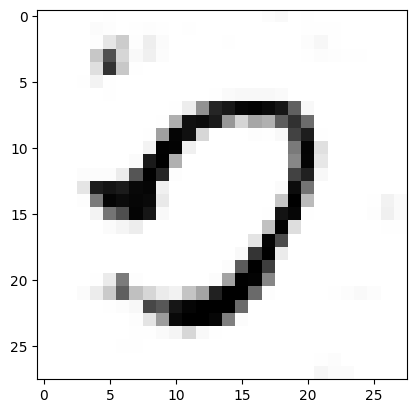

In [10]:
print(noise[0][0][0][0])
plt.imshow(image, cmap='Greys')